In [49]:
a = map(int, input().split())
print(type(a))

print(a)

7 8
<class 'map'>


In [74]:
time_hour,time_minte = map(int, input().split())
time_minte1 = time_minte - 45

if time_minte1 < 0:
    time_hour = time_hour - 1
    time_minte = 60 + time_minte1
    print(time_hour,time_minte,sep = " ") 
else:    
    print(time_hour,time_minte1,sep = " ")

20 45
20 0


In [44]:
x = int(input())
y = int(input())

if x>0 and y>0:
    print("1")

if x<0 and y>0:
    print("2")

if x<0 and y<0:
    print("3")

if x>0 and y<0:
    print("4")

KeyboardInterrupt: Interrupted by user

# chap 4. matplotilb으로 그래프 그리기
1. 선그래프

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # 그래프 모듈

In [3]:
df = pd.read_excel("./data/시도별 전출입 인구수.xlsx",header=0)
df.head(7)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
6,NaN,광주광역시,-,-,-,-,-,-,-,-,...,268757,293879,268574,260561,228612,226696,243066,224603,213176,208138


In [4]:
# Nan 을 이전 자료로 대체 : df.fillna(method ="ffill")
df = df.fillna(method = "ffill")
df.tail(3)


# 전출지가 "서울특별시" 에서 다른 도시로 이전한 인구수의 분포를
# 분석 하고자 함
mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] !="서울특별시")
df_seoul = df[mask]      # mask의 값이 True인 행만 추출
df_seoul

# 전출지별의 값은 모두 "서울특별시"이므로 칼럼 삭제(왜?)
df_seoul = df_seoul.drop("전출지별", axis =1)
df_seoul

# 전입지별 컬럼명을 "전입지"로 변경
df_seoul.rename({"전입지별" : "전입지"}, axis = 1, inplace = True)
df_seoul

# "전입지" 칼럼을 인덱스로 설정
df_seoul.set_index("전입지",inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


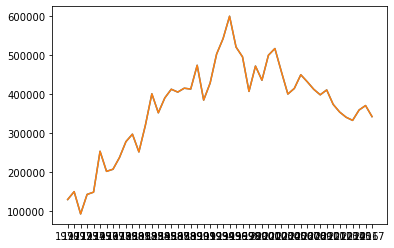

In [24]:
# df_seoul 에서 전입지가 "경기도"인 자료만 추출
sr_one = df_seoul.loc["경기도"]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)
plt.plot(sr_one.index,sr_one.values)

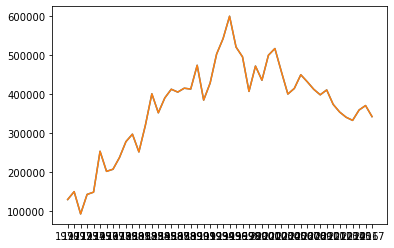

In [25]:
# df_seoul 에서 전입지가 "경기도"인 자료만 추출
sr_one = df_seoul.loc["경기도"]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)
plt.plot(sr_one.index,sr_one.values)

# matplotlib 한글 폰트 문제 해결
# %load 파일명(fonts.py)
from matplotlib import rc
rc("font", family = "Malgun Gothic")
plt.rc("axes",unicode_minus = False)

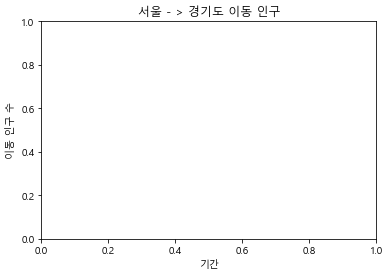

In [26]:
# 그래프 제목추가, 축 이름 추가
# 서울 -> 경기도 이동 인구
# x축 이름 -> "기간" y축 이름 -> "인구수" 
plt.title("서울 - > 경기도 이동 인구")
plt.xlabel("기간")
plt.ylabel("이동 인구 수")
plt.show()

AttributeError: 'Line2D' object has no property 'makersize'

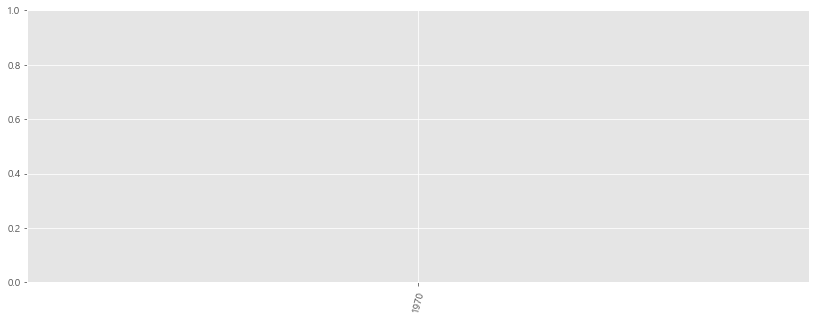

In [39]:
plt.figure(figsize = (14,5)) # 그래프 사이즈 지정
plt.style.use("ggplot")  # 표 스타일 설정
# x축 눈금 라벨 회전 : plt.xticks(rotation = "verticla")
# plt.xticks(rotation = "vertical")
plt.xticks(rotation = 75) # rotation = 숫자는 회전 각도
plt.plot(sr_one,marker = "o",makersize = 10)

plt.title("서울 - > 경기도 이동 인구", size=20)
plt.xlabel("기간")
plt.ylabel("이동 인구 수",size=14)
plt.legend(labels = ["서울 -> 경기"],loc = "upper left")



plt.show()


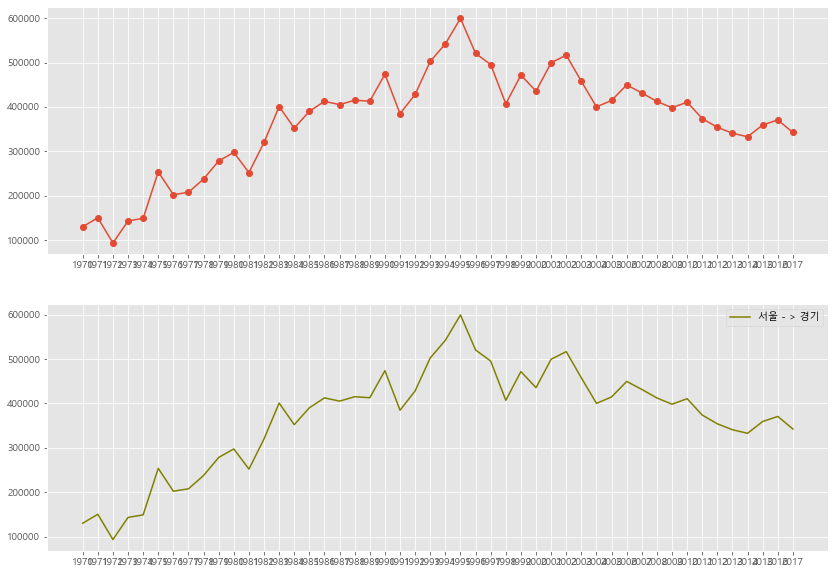

In [63]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()
fig = plt.figure(figsize = (14,10))

ax1 = fig.add_subplot(2,1,1) # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2,1,2) 

# axe 객체에 plot 함수로 그래프 그리기
ax1.plot(sr_one,marker = "o")
ax2.plot(sr_one,color = "olive", label = "서울 - > 경기")
ax2.legend(loc = "best")

ax1.set
ax1.set_xticks(sr_one.index, rotation = 75)
plt.show()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


InvalidIndexError: ('충청남도', slice(None, None, None))

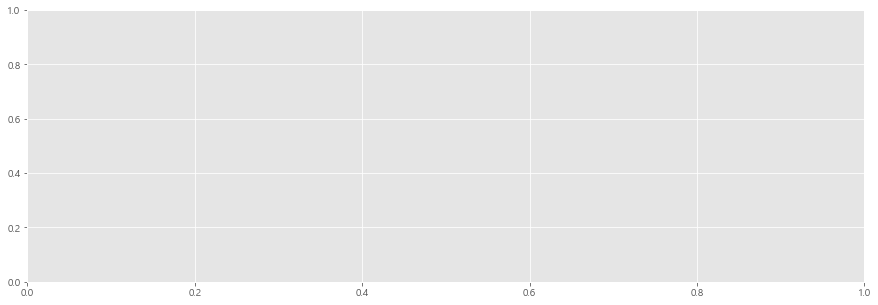

In [81]:
col_years = list(map(str,range(1970,2018)))
col_years

df_1 = df_seoul.loc[["충청남도","경상북도","강원도"]]
df_1

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1,1,1)

# axe 에 그래프를 추가
ax.plot(col_years,df_1["충청남도",:],color = "red",label = "서울->충남")
ax.plot(col_years,df_1["경상북도",:],color = "blue",label = "서울->경북")
ax.plot(col_years,df_1["강원도",:1],color = "orange",label = "서울->강원도")

ax.legend(loc = "best")
 
    
# xlabel 추가
ax.set_xlabel("기간", size = 12)
ax.set_ylabel("이동 인구수", size = 12)

plt.show()




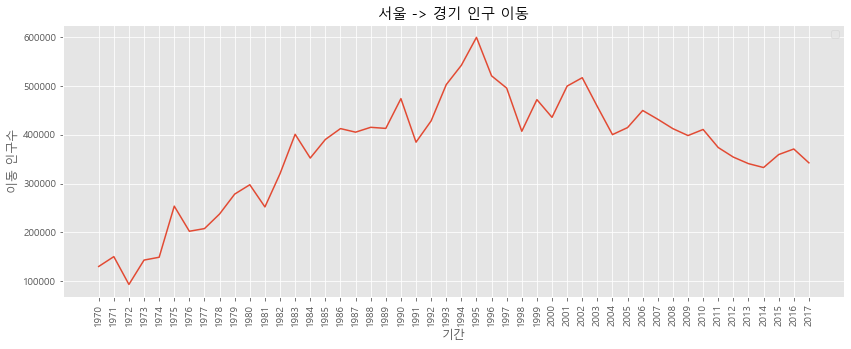

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./data/시도별 전출입 인구수.xlsx",header = 0)
df = df.fillna(method = "ffill")  # 전출지별에서 누락값(NaN)을 앞 데이터로 채움


mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] !="서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis = 1)
df_seoul.rename({"전입지별" : "전입지"},axis = 1,inplace = True)

# df_seoul
df_seoul.set_index("전입지", inplace = True)
sr_one = df_seoul.loc["경기도"]



plt.figure(figsize = (14,5))
plt.xticks(rotation = "vertical")

plt.title("서울 -> 경기 인구 이동")
plt.xlabel("기간")
plt.ylabel("이동 인구수")
plt.legend(labels = ["서울 ->경기"],loc = "best")

plt.plot(sr_one.index,sr_one.values)

# plt.title("")

C:\Users\HPE\AppData\Local\Temp\ipykernel_2820\3598830053.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
C:\Users\HPE\AppData\Local\Temp\ipykernel_2820\3598830053.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


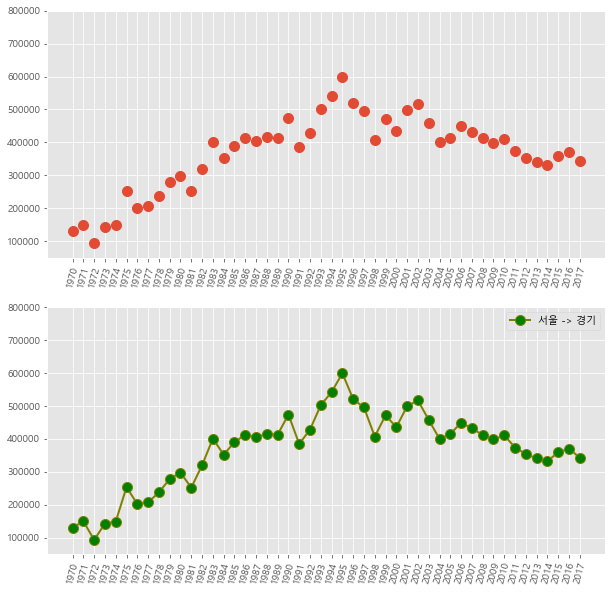

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("./data/시도별 전출입 인구수.xlsx",header = 0)
df = df.fillna(method = "ffill")  # 전출지별에서 누락값(NaN)을 앞 데이터로 채움


mask = (df["전출지별"] == "서울특별시") & (df["전입지별"] !="서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(["전출지별"], axis = 1)
df_seoul.rename({"전입지별" : "전입지"},axis = 1,inplace = True)

# df_seoul
df_seoul.set_index("전입지", inplace = True)
sr_one = df_seoul.loc["경기도"]



fig = plt.figure(figsize = (10,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one,"o", markersize = 10)
ax2.plot(sr_one,marker = "o",markerfacecolor = "green", markersize = 10,
        color = "olive",linewidth = 2,label = "서울 -> 경기")
ax2.legend(loc = "best")

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)


ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()
# plt.title("")

In [4]:
h,m = map(int, input().split())

if m < 45:
    if(h != 0):
        print(h-1, 15+m)
    else:
        print(23-h, 15+m)
elif m >= 45:   
    print(h, m-45)

0 23
23 38


In [14]:
h,m = map(int, input().split())
s = int(input())

c_h = (h + ((m+s)//60)) % 24
c_m = (m+s)%60
print(c_h,c_m)

23 56
48
0 44
